In [1]:
# Allow the PyMC3 models to be imported in the notebook folder

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pickle

from matplotlib import pyplot as plt
import numpy as np
from pymc3 import summary, traceplot
import pymc3 as pm

import theano
import theano.tensor as T

%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (15, 10)

plt.rcParams['font.size'] = 16

In [4]:
from pymc3_models.models.LogisticRegression import LogisticRegression

Generate Synthetic Data
===

In [5]:
num_pred = 2
num_samples = 10000

In [6]:
alphas = 5 * np.random.randn(1) + 5
betas = 10 * np.random.randn(1, num_pred) + 10

In [7]:
alphas

array([-2.46731847])

In [8]:
betas

array([[11.0864078 , 13.03901606]])

In [9]:
def numpy_invlogit(x):
    return 1 / (1 + np.exp(-x))

In [10]:
X = np.random.randn(num_samples, num_pred)
Y = np.random.binomial(
    1,
    numpy_invlogit(alphas[0] + np.sum(betas * X, 1))
)

Fit w/ ADVI
===

In [11]:
LR1 = LogisticRegression()

In [12]:
LR1.fit(X, Y, minibatch_size=2000, inference_args={'n': 60000},
       scale = 2.5, dof = 3)

/anaconda3/envs/Main/lib/python3.6/site-packages/pymc3/data.py:244: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])
/anaconda3/envs/Main/lib/python3.6/site-packages/pymc3/data.py:244: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])
Average Loss = 178.72: 100%|██████████| 60000/60000 [00:40<00:00, 1466.40it/s]
Finished [100%]: Average Loss = 178.71


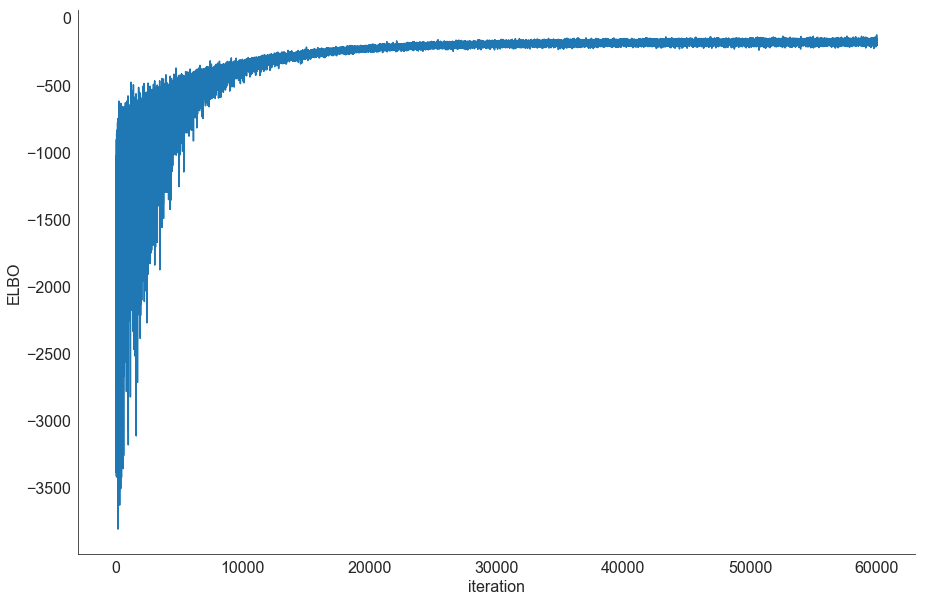

In [13]:
LR1.plot_elbo()

In [14]:
summary(LR1.trace[1000:])

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha__0,-1.854067,0.141466,0.001322,-2.137977,-1.576052
betas__0_0,8.514939,0.180181,0.001861,8.149415,8.862853
betas__0_1,10.119353,0.215568,0.002128,9.707421,10.536784


In [15]:
summary(LR1.trace[1000:])

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha__0,-1.854067,0.141466,0.001322,-2.137977,-1.576052
betas__0_0,8.514939,0.180181,0.001861,8.149415,8.862853
betas__0_1,10.119353,0.215568,0.002128,9.707421,10.536784


In [16]:
alphas

array([-2.46731847])

In [17]:
betas

array([[11.0864078 , 13.03901606]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1a448cc0>,
      dtype=object)

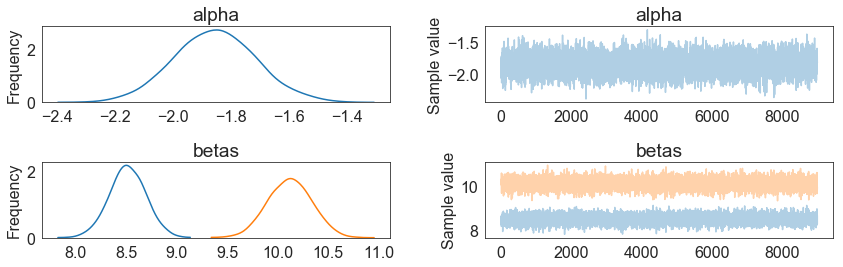

In [18]:
traceplot(LR1.trace[1000:])

In [19]:
#probs = HLM1.predict_proba(X, cats)

In [20]:
#pred = HLM1.predict(X, cats)

In [21]:
LR1.score(X, Y)

100%|██████████| 2000/2000 [00:24<00:00, 84.23it/s]


0.9653

In [22]:
LR1.save('pickle_jar/LR_jar/')

FileNotFoundError: [Errno 2] No such file or directory: 'pickle_jar/LR_jar/trace.pickle'

In [23]:
LR2 = LogisticRegression()

In [24]:
LR2.load('pickle_jar/LR_jar/')

FileNotFoundError: [Errno 2] No such file or directory: 'pickle_jar/LR_jar/trace.pickle'

In [ ]:
LR2.score(X, Y)

Fit w/ NUTS
===

In [ ]:
LR3 = LogisticRegression()

In [ ]:
LR3.fit(X, Y, inference_type='nuts', inference_args={'draws': 2000})

In [ ]:
traceplot(LR3.trace[1000:])

In [ ]:
summary(LR3.trace[1000:])

In [ ]:
LR3.score(X, Y)

Compare to sklearn
===

In [ ]:
from sklearn.linear_model import LogisticRegression as sklearn_LR

In [ ]:
SLR = sklearn_LR()

In [ ]:
SLR.fit(X, Y)

In [ ]:
SLR.score(X, Y)

In [ ]:
alphas

In [ ]:
SLR.intercept_

In [ ]:
betas

In [ ]:
SLR.coef_